In [1]:

from pathlib import Path
import pandas as pd


cwd = Path.cwd()
data_dir = None
for p in [cwd] + list(cwd.parents):
    candidate = p / "Data"
    if candidate.is_dir():
        data_dir = candidate
        break

if data_dir is None:
    raise FileNotFoundError("No se encontró la carpeta `Data` en los padres del directorio actual.")


csv_files = list(data_dir.glob("*.csv"))

# leer el archivo específico
file_path = data_dir / "accepted_2007_to_2018Q4.csv"

In [3]:
df_accepted = pd.read_csv(file_path, low_memory=False)
df_accepted.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
file_path = data_dir / "rejected_2007_to_2018Q4.csv"
df_rejected = pd.read_csv(file_path, low_memory=False)
df_rejected.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0


In [5]:
df_accepted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [6]:
df_accepted.shape

(2260701, 151)

In [7]:
df_rejected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Amount Requested      float64
 1   Application Date      object 
 2   Loan Title            object 
 3   Risk_Score            float64
 4   Debt-To-Income Ratio  object 
 5   Zip Code              object 
 6   State                 object 
 7   Employment Length     object 
 8   Policy Code           float64
dtypes: float64(3), object(6)
memory usage: 1.9+ GB


In [8]:
df_rejected.shape

(27648741, 9)

In [9]:
df_accepted.describe(include='all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
count,2260701,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2260668,2.260668e+06,2.260668e+06,2260668,2260668,...,10917.000000,10917.000000,2260668,2260668,34246,34246,34246,34246.000000,34246.000000,34246.000000
unique,2260701,NaN,NaN,NaN,NaN,2,NaN,NaN,7,35,...,NaN,NaN,2,2,83,3,90,NaN,NaN,NaN
top,Total amount funded in policy code 2: 521953170,NaN,NaN,NaN,NaN,36 months,NaN,NaN,B,C1,...,NaN,NaN,Cash,N,Feb-2019,ACTIVE,Jan-2019,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,1609754,NaN,NaN,663557,145903,...,NaN,NaN,2182546,2226422,2606,14704,1710,NaN,NaN,NaN
mean,NaN,NaN,1.504693e+04,1.504166e+04,1.502344e+04,NaN,1.309283e+01,4.458068e+02,NaN,NaN,...,11636.883942,193.994321,NaN,NaN,NaN,NaN,NaN,5010.664267,47.780365,13.191322
std,NaN,NaN,9.190245e+03,9.188413e+03,9.192332e+03,NaN,4.832138e+00,2.671735e+02,NaN,NaN,...,7625.988281,198.629496,NaN,NaN,NaN,NaN,NaN,3693.122590,7.311822,8.159980
min,NaN,NaN,5.000000e+02,5.000000e+02,0.000000e+00,NaN,5.310000e+00,4.930000e+00,NaN,NaN,...,55.730000,0.010000,NaN,NaN,NaN,NaN,NaN,44.210000,0.200000,0.000000
25%,NaN,NaN,8.000000e+03,8.000000e+03,8.000000e+03,NaN,9.490000e+00,2.516500e+02,NaN,NaN,...,5627.000000,44.440000,NaN,NaN,NaN,NaN,NaN,2208.000000,45.000000,6.000000
50%,NaN,NaN,1.290000e+04,1.287500e+04,1.280000e+04,NaN,1.262000e+01,3.779900e+02,NaN,NaN,...,10028.390000,133.160000,NaN,NaN,NaN,NaN,NaN,4146.110000,45.000000,14.000000
75%,NaN,NaN,2.000000e+04,2.000000e+04,2.000000e+04,NaN,1.599000e+01,5.933200e+02,NaN,NaN,...,16151.890000,284.190000,NaN,NaN,NaN,NaN,NaN,6850.172500,50.000000,18.000000


In [10]:
df_rejected.describe(include='all')

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
count,2.764874e+07,27648741,27647436,9.151111e+06,27648741,27648448,27648719,26697386,2.764782e+07
unique,NaN,4238,73927,NaN,126145,1001,51,11,NaN
top,NaN,2018-12-04,Debt consolidation,NaN,100%,112xx,CA,< 1 year,NaN
freq,NaN,42112,6418016,NaN,1362556,267102,3242169,22994315,NaN
mean,1.313324e+04,NaN,NaN,6.281721e+02,NaN,NaN,NaN,NaN,6.375113e-03
std,1.500964e+04,NaN,NaN,8.993679e+01,NaN,NaN,NaN,NaN,1.127368e-01
min,0.000000e+00,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,0.000000e+00
25%,4.800000e+03,NaN,NaN,5.910000e+02,NaN,NaN,NaN,NaN,0.000000e+00
50%,1.000000e+04,NaN,NaN,6.370000e+02,NaN,NaN,NaN,NaN,0.000000e+00
75%,2.000000e+04,NaN,NaN,6.750000e+02,NaN,NaN,NaN,NaN,0.000000e+00


In [11]:
df_accepted.isnull().sum()

id                             0
member_id                2260701
loan_amnt                     33
funded_amnt                   33
funded_amnt_inv               33
                          ...   
settlement_status        2226455
settlement_date          2226455
settlement_amount        2226455
settlement_percentage    2226455
settlement_term          2226455
Length: 151, dtype: int64

In [12]:
df_rejected.isnull().sum()

Amount Requested               0
Application Date               0
Loan Title                  1305
Risk_Score              18497630
Debt-To-Income Ratio           0
Zip Code                     293
State                         22
Employment Length         951355
Policy Code                  918
dtype: int64

In [13]:
print(df_accepted.columns.tolist())

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq',

In [14]:
print(df_accepted.isnull().sum().tolist())

[0, 2260701, 33, 33, 33, 33, 33, 33, 33, 33, 167002, 146940, 33, 37, 33, 33, 33, 33, 33, 2134636, 33, 23359, 34, 33, 1744, 62, 62, 33, 33, 63, 1158535, 1901545, 62, 62, 33, 1835, 62, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 2460, 33, 1345343, 105, 33, 33, 178, 1679926, 33, 33, 2139991, 2139995, 2144971, 62, 70309, 70309, 866163, 866162, 866162, 866162, 909957, 866162, 1068883, 866162, 866162, 866162, 866381, 70309, 866162, 866163, 866163, 50063, 70379, 74968, 76104, 178, 62, 139104, 70310, 70310, 70309, 50063, 73445, 1741000, 295468, 1520342, 70309, 70309, 70309, 58623, 70309, 70309, 70309, 70310, 70309, 58623, 153690, 70309, 70309, 70309, 70464, 75412, 1398, 138, 70309, 50063, 50063, 70309, 2152681, 2152680, 2152680, 2152680, 2152680, 2152680, 2152680, 2154517, 2152680, 2152680, 2152680, 2152680, 2224759, 33, 2249784, 2249784, 2249784, 2249784, 2249784, 2249784, 2249784, 2249784, 2249784, 2249784, 2249784, 2252050, 2249784, 2249784, 33, 33, 2226455, 2226455, 2226455, 2226455, 2226455, 

## Limpieza y Preparación de Datos

Si no hay monto de préstamo, no hay préstamo. Esto elimina las filas vacías/totales.

In [15]:
df_accepted = df_accepted.dropna(subset=['loan_amnt'])

SELECCIÓN DE COLUMNAS (Eliminar columnas con exceso de nulos)

In [16]:
# Calculamos el % de nulos actual
null_percent = df_accepted.isnull().mean() * 100

# ESTRATEGIA: Eliminar columnas con más del 40% de datos faltantes
# Excepción: 'mths_since...' a veces son útiles, pero para este nivel, causan ruido.
# Esto eliminará: member_id, desc, url, variables joint, hardship, settlement, etc.
cols_to_drop = null_percent[null_percent > 40].index.tolist()

# También eliminamos identificadores que no aportan valor analítico
useless_cols = ['id', 'url', 'zip_code', 'policy_code', 'title'] # zip_code parcial no sirve mucho, addr_state es mejor
cols_to_drop.extend([c for c in useless_cols if c in df_accepted.columns])

# Ejecutamos el borrado
df_accepted = df_accepted.drop(columns=cols_to_drop, errors='ignore')

print(f"Dimensiones tras eliminar columnas vacías/inútiles: {df_accepted.shape}")

Dimensiones tras eliminar columnas vacías/inútiles: (2260668, 100)


LIMPIEZA DE FORMATOS DE DATOS (Data Type Fixing)

In [17]:
# A) Fechas: Convertir de texto (e.g., 'Dec-2015') a datetime
date_cols = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']
for col in date_cols:
    if col in df_accepted.columns:
        df_accepted[col] = pd.to_datetime(df_accepted[col], format='%b-%Y', errors='coerce')

# B) Término (term): De " 36 months" a 36 (numérico)
if 'term' in df_accepted.columns and df_accepted['term'].dtype == object:
    df_accepted['term'] = df_accepted['term'].str.extract('(\d+)').astype(float)

# C) Tasa de Interés y Utilización: Quitar el '%' si existe
# Nota: A veces pandas lo carga ya como float. Verificamos primero.
for col in ['int_rate', 'revol_util']:
    if col in df_accepted.columns and df_accepted[col].dtype == object:
        df_accepted[col] = df_accepted[col].str.rstrip('%').astype(float)

# D) Antigüedad laboral (emp_length): Limpiar "< 1 year", "10+ years"
# Lo convertimos a numérico simple para poder correlacionar
def clean_emp_length(x):
    if pd.isna(x): return None
    if '<' in x: return 0
    if '10+' in x: return 10
    return int(''.join(filter(str.isdigit, x)))

if 'emp_length' in df_accepted.columns:
    df_accepted['emp_length_num'] = df_accepted['emp_length'].apply(clean_emp_length)
    # Opcional: tirar la columna vieja de texto si prefieres la numérica
    # df = df.drop(columns=['emp_length'])


<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
C:\Users\franc\AppData\Local\Temp\ipykernel_26020\1079657839.py:9: SyntaxWarning: invalid escape sequence '\d'
  df_accepted['term'] = df_accepted['term'].str.extract('(\d+)').astype(float)


Ahora pasamos con la limpieza de datos para el reject df

In [18]:
df_rej = df_rejected.copy()

# 2. Convertir Fecha de Aplicación a DateTime
# El formato suele ser AAAA-MM-DD en este archivo
df_rej['Application Date'] = pd.to_datetime(df_rej['Application Date'], errors='coerce')

# 3. Limpiar Debt-To-Income Ratio (DTI)
# Viene como "100%", "12.5%", etc. Necesitamos número float.
if df_rej['Debt-To-Income Ratio'].dtype == object:
    df_rej['Debt-To-Income Ratio'] = (df_rej['Debt-To-Income Ratio']
                                      .astype(str)
                                      .str.replace('%', '')
                                      .astype(float))

# 4. Manejo de Nulos en Risk_Score
# NO borramos las filas (perderíamos 18M de datos). 
# Llenamos con -1 para indicar "Sin Score"
df_rej['Risk_Score'] = df_rej['Risk_Score'].fillna(-1)

# 5. Limpieza de 'Employment Length'
# Usamos una lógica similar al dataset de aceptados para tener consistencia
def clean_emp_length_rej(x):
    if pd.isna(x) or x == 'n/a': return 0
    if '<' in str(x): return 0
    if '10+' in str(x): return 10
    # Extraer primer digito encontrado
    import re
    nums = re.findall(r'\d+', str(x))
    return int(nums[0]) if nums else 0

df_rej['Employment Length Num'] = df_rej['Employment Length'].apply(clean_emp_length_rej)

# 6. Eliminar nulos residuales pequeños (Zip Code, State, Policy Code)
# Como son muy pocos comparado con el total, los borramos sin miedo
df_rej = df_rej.dropna(subset=['State', 'Zip Code'])

In [19]:
# Extraer Año y Mes para ver tendencias temporales
df_rej['Year'] = df_rej['Application Date'].dt.year
df_rej['Month'] = df_rej['Application Date'].dt.month

df_rejected = df_rej

print("Dimensiones finales df_rejected:", df_rejected.shape)

Dimensiones finales df_rejected: (27648448, 12)


In [20]:
df_rejected.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code,Employment Length Num,Year,Month
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10.00,481xx,NM,4 years,0.0,4,2007,5
1,1000.0,2007-05-26,Consolidating Debt,703.0,10.00,010xx,MA,< 1 year,0.0,0,2007,5
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10.00,212xx,MD,1 year,0.0,1,2007,5
3,6000.0,2007-05-27,waksman,698.0,38.64,017xx,MA,< 1 year,0.0,0,2007,5
4,1500.0,2007-05-27,mdrigo,509.0,9.43,209xx,MD,< 1 year,0.0,0,2007,5


## Creación de la Variable Objetivo (Target Variable Creation)

In [21]:
def categorize_status(status):
    # 1. BUENOS PAGADORES
    if status in [
        'Fully Paid', 
        'Current', 
        'Does not meet the credit policy. Status:Fully Paid'
    ]:
        return 'Good'
    
    # 2. INCUMPLIMIENTO / PÉRDIDA (Target = 1)
    elif status in [
        'Charged Off', 
        'Default', 
        'Does not meet the credit policy. Status:Charged Off'
    ]:
        return 'Bad'
    
    # 3. ALERTA / MORA (Están vivos pero con problemas)
    elif status in [
        'In Grace Period', 
        'Late (16-30 days)', 
        'Late (31-120 days)'
    ]:
        return 'Warning'
    
    else:
        return 'Unknown'

# Aplicamos la función
df_accepted['loan_status_cat'] = df_accepted['loan_status'].apply(categorize_status)

# Creamos la variable binaria numérica para correlaciones y modelos
# 1 = Malo (Default), 0 = Bueno (Pagado/Al día). 
# NOTA: Ignoramos 'Warning' en el binario o lo tratamos como 1 dependiendo del rigor.
# Aquí seremos estrictos: Si ya cargó pérdida ('Bad') es 1, el resto 0.
df_accepted['target'] = df_accepted['loan_status_cat'].apply(lambda x: 1 if x == 'Bad' else 0)

# Verificamos cómo quedó la distribución
print("Conteo por categoría:")
print(df_accepted['loan_status_cat'].value_counts())

print("\nPorcentaje de Default (Bad Rate) en el dataset:")
print(round(df_accepted['target'].mean() * 100, 2), "%")

Conteo por categoría:
loan_status_cat
Good       1957056
Bad         269360
Warning      34252
Name: count, dtype: int64

Porcentaje de Default (Bad Rate) en el dataset:
11.92 %


In [22]:
df_accepted["loan_status"].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

## Analisis descriptivo y Visualizaciones

Distribución de la variable objetivo

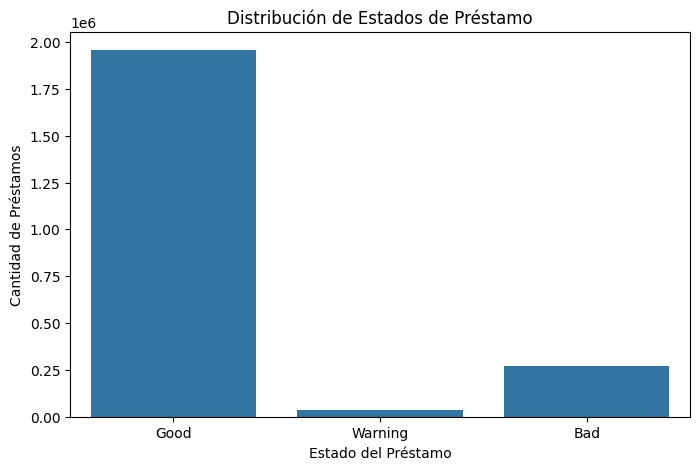

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de la variable objetivo

plt.figure(figsize=(8,5))
sns.countplot(x='loan_status_cat', data=df_accepted, order=['Good', 'Warning', 'Bad'])
plt.title('Distribución de Estados de Préstamo')
plt.xlabel('Estado del Préstamo')
plt.ylabel('Cantidad de Préstamos')
plt.show()

Volumén de prestamos por grado (Risk Grade)

C:\Users\franc\AppData\Local\Temp\ipykernel_26020\1590800401.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_accepted, x='grade', order=order_grade, palette='Blues_d')


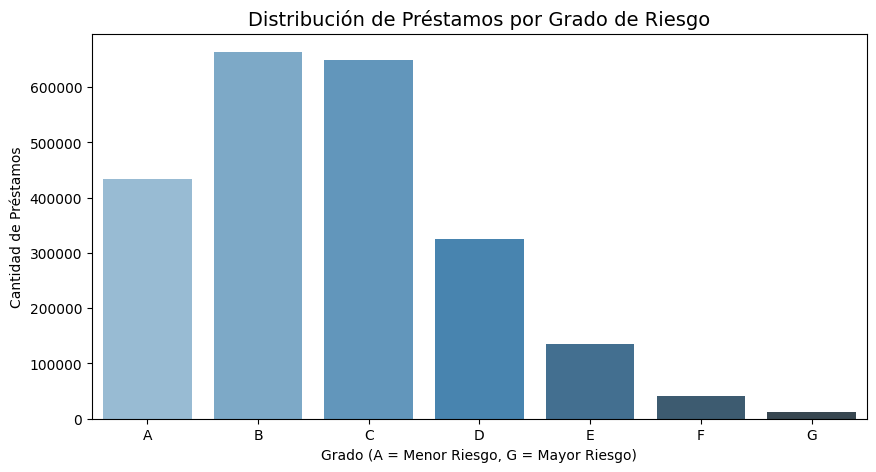

In [24]:
plt.figure(figsize=(10, 5))
# Ordenamos alfabéticamente los grados
order_grade = sorted(df_accepted['grade'].unique())
sns.countplot(data=df_accepted, x='grade', order=order_grade, palette='Blues_d')
plt.title('Distribución de Préstamos por Grado de Riesgo', fontsize=14)
plt.xlabel('Grado (A = Menor Riesgo, G = Mayor Riesgo)')
plt.ylabel('Cantidad de Préstamos')
plt.show()

Tasa de impago por grado para asegurarnos que Lending Club este clasficando bien el riesgo

C:\Users\franc\AppData\Local\Temp\ipykernel_26020\1225829682.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=risk_by_grade, x='grade', y='target', order=order_grade, palette='Reds')


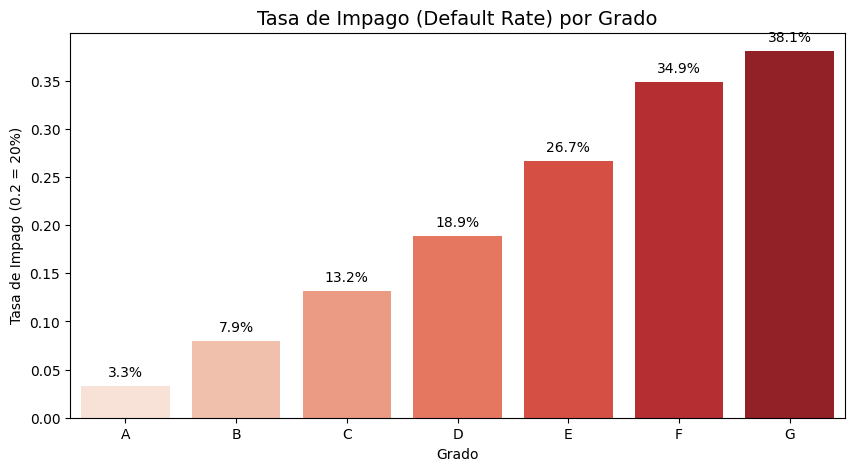

In [25]:
plt.figure(figsize=(10, 5))
# Calculamos el promedio de 'target' (que es 0 o 1) por grupo -> Eso nos da la Tasa de Default
risk_by_grade = df_accepted.groupby('grade')['target'].mean().reset_index()

sns.barplot(data=risk_by_grade, x='grade', y='target', order=order_grade, palette='Reds')
plt.title('Tasa de Impago (Default Rate) por Grado', fontsize=14)
plt.ylabel('Tasa de Impago (0.2 = 20%)')
plt.xlabel('Grado')
# Agregar etiquetas de porcentaje encima de las barras
for index, row in risk_by_grade.iterrows():
    plt.text(index, row.target + 0.01, f'{row.target:.1%}', color='black', ha="center")
plt.show()

¿Cuál es la proporción de préstamos en mora (charged-off, late, fully paid)?

--- PROPORCIÓN DE ESTADOS DEL PRÉSTAMO ---
status_group
Fully Paid             47.717710
Current (Active)       38.852100
Charged Off (Loss)     11.915062
Late / Grace Period     1.515127
Name: proportion, dtype: float64


C:\Users\franc\AppData\Local\Temp\ipykernel_26020\2760888788.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=status_counts.values, y=status_counts.index, palette='viridis')


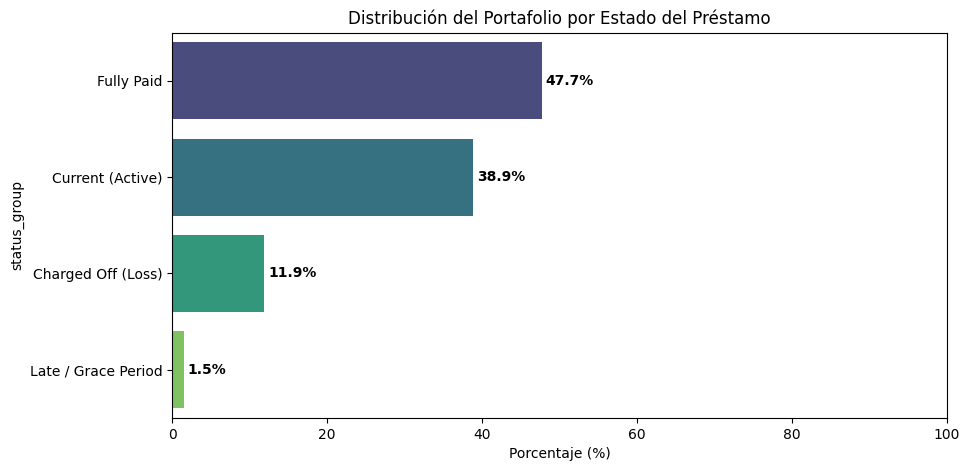

In [26]:
# 1. Agrupamos los estados (Raw status) en categorías de negocio simplificadas
def simple_status(status):
    if status in ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']:
        return 'Fully Paid'
    elif status in ['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off']:
        return 'Charged Off (Loss)'
    elif status in ['Current']:
        return 'Current (Active)'
    else:
        return 'Late / Grace Period' # Incluye In Grace Period, Late 16-30, Late 31-120

# Aplicamos la agrupación sobre el dataframe original
df_accepted['status_group'] = df_accepted['loan_status'].apply(simple_status)

# 2. Calculamos proporciones
status_counts = df_accepted['status_group'].value_counts(normalize=True) * 100

print("--- PROPORCIÓN DE ESTADOS DEL PRÉSTAMO ---")
print(status_counts)

# 3. Visualización (Gráfico de Barras Horizontal)
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=status_counts.values, y=status_counts.index, palette='viridis')

# Poner etiquetas de % en las barras
for i, v in enumerate(status_counts.values):
    ax.text(v + 0.5, i, f'{v:.1f}%', color='black', va='center', fontweight='bold')

plt.title('Distribución del Portafolio por Estado del Préstamo')
plt.xlabel('Porcentaje (%)')
plt.xlim(0, 100) # Para que se vea bien la escala
plt.show()


Que caracteristicas tienen los préstamos que terminan en default vs los que se pagan completamente

In [27]:
df_accepted['status_group'].unique()

array(['Fully Paid', 'Current (Active)', 'Charged Off (Loss)',
       'Late / Grace Period'], dtype=object)

C:\Users\franc\AppData\Local\Temp\ipykernel_26020\1128264926.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=comparison_df, x='status_group', y='fico_range_low', ax=axes[0, 0], palette='Set2')
C:\Users\franc\AppData\Local\Temp\ipykernel_26020\1128264926.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=comparison_df, x='status_group', y='dti', ax=axes[0, 1], palette='Set2', showfliers=False)
C:\Users\franc\AppData\Local\Temp\ipykernel_26020\1128264926.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=comparison_df, 

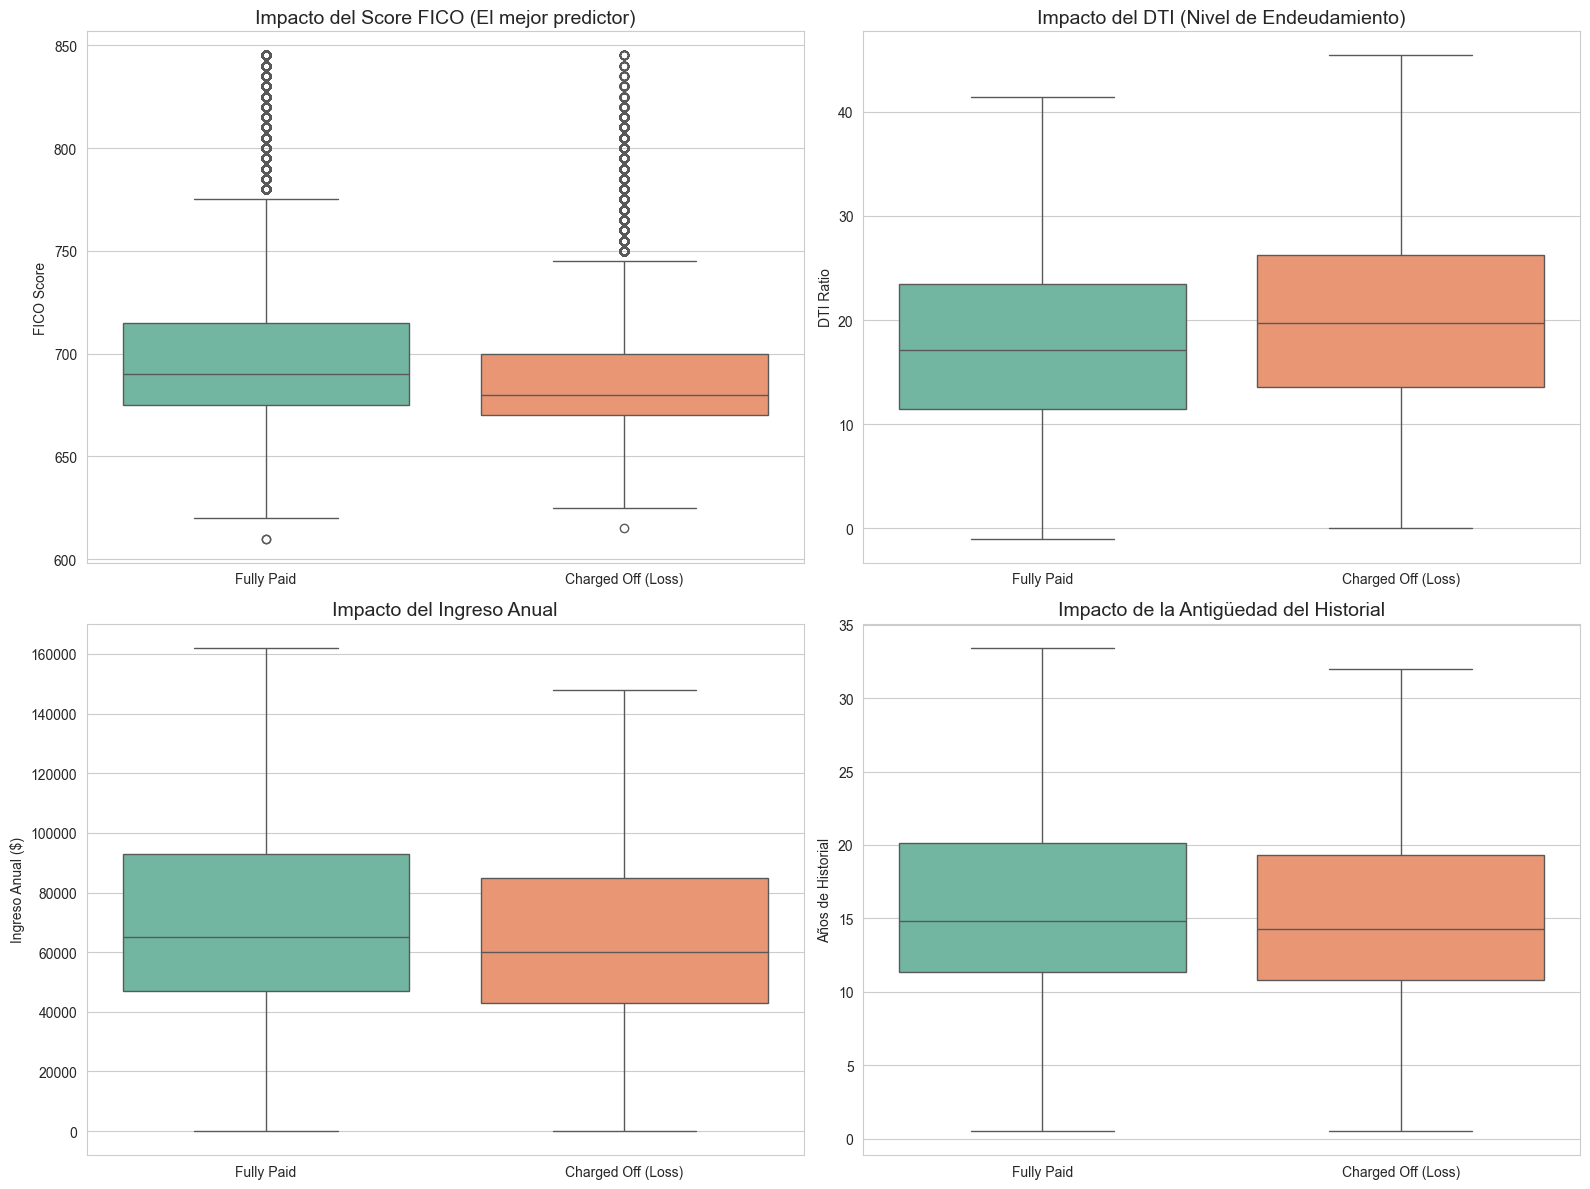


--- PERFIL PROMEDIO: BUEN PAGADOR VS MAL PAGADOR ---
                    fico_range_low    dti  annual_inc  credit_hist_years
status_group                                                            
Charged Off (Loss)          687.83  20.15    70398.83              15.75
Fully Paid                  698.24  17.80    77695.72              16.38


In [28]:
# Configuración visual
sns.set_style("whitegrid")

# -----------------------------------------------------------------------
# 1. FILTRADO CORRECTO (Usando tus nombres exactos)
# -----------------------------------------------------------------------
# Seleccionamos solo los casos cerrados: Pagados vs Pérdidas
comparison_df = df_accepted[df_accepted['status_group'].isin(['Fully Paid', 'Charged Off (Loss)'])].copy()

# -----------------------------------------------------------------------
# 2. PREPARACIÓN DE VARIABLES (Feature Engineering)
# -----------------------------------------------------------------------

# A) Fechas: Aseguramos formato datetime para calcular antigüedad
for col in ['issue_d', 'earliest_cr_line']:
    # Usamos errors='coerce' para que si hay una fecha rara no rompa el código
    comparison_df[col] = pd.to_datetime(comparison_df[col], errors='coerce')

# B) Calcular Años de Historial Crediticio (Proxy de "Edad Financiera")
# (Fecha del préstamo - Fecha de primera línea de crédito) / 365 días
comparison_df['credit_hist_years'] = (comparison_df['issue_d'] - comparison_df['earliest_cr_line']).dt.days / 365.25

# -----------------------------------------------------------------------
# 3. VISUALIZACIÓN DE COMPARATIVAS (Boxplots)
# -----------------------------------------------------------------------

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# GRÁFICA 1: FICO Score (Historial Crediticio)
sns.boxplot(data=comparison_df, x='status_group', y='fico_range_low', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Impacto del Score FICO (El mejor predictor)', fontsize=14)
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('FICO Score')

# GRÁFICA 2: DTI (Deuda / Ingreso)
# showfliers=False oculta los puntos extremos para ver mejor la "caja" principal
sns.boxplot(data=comparison_df, x='status_group', y='dti', ax=axes[0, 1], palette='Set2', showfliers=False)
axes[0, 1].set_title('Impacto del DTI (Nivel de Endeudamiento)', fontsize=14)
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('DTI Ratio')

# GRÁFICA 3: Ingreso Anual
# Limitamos visualmente para no ver millonarios que distorsionan la gráfica
sns.boxplot(data=comparison_df, x='status_group', y='annual_inc', ax=axes[1, 0], palette='Set2', showfliers=False)
axes[1, 0].set_title('Impacto del Ingreso Anual', fontsize=14)
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('Ingreso Anual ($)')

# GRÁFICA 4: Antigüedad Historial (Experiencia Crediticia)
sns.boxplot(data=comparison_df, x='status_group', y='credit_hist_years', ax=axes[1, 1], palette='Set2', showfliers=False)
axes[1, 1].set_title('Impacto de la Antigüedad del Historial', fontsize=14)
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('Años de Historial')

plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------
# 4. TABLA RESUMEN NUMÉRICA (Promedios)
# -----------------------------------------------------------------------
summary_cols = ['fico_range_low', 'dti', 'annual_inc', 'credit_hist_years']
summary_table = comparison_df.groupby('status_group')[summary_cols].mean().round(2)

print("\n--- PERFIL PROMEDIO: BUEN PAGADOR VS MAL PAGADOR ---")
print(summary_table)

Mapa de calor de correlaciones entre variables numéricas clave y la variable objetivo

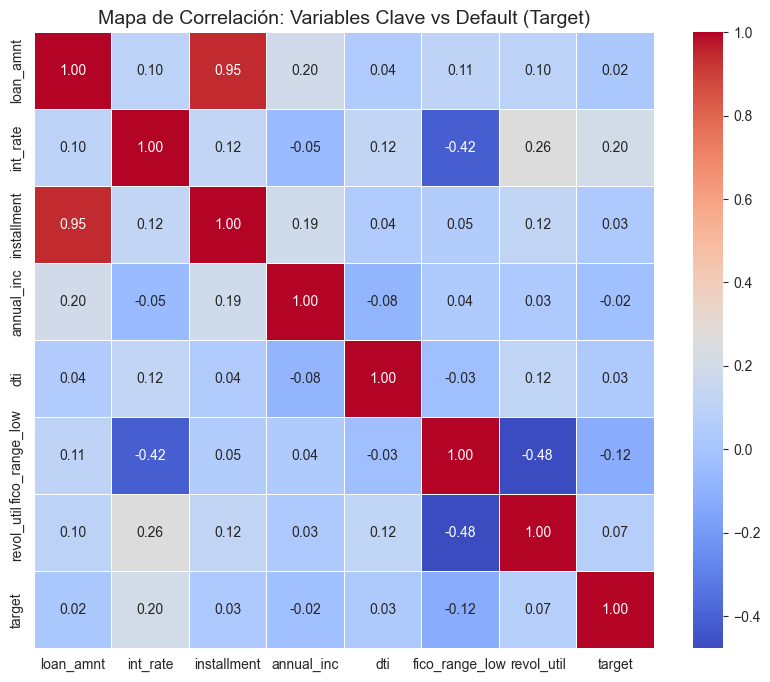

In [29]:
# Seleccionamos solo variables numéricas relevantes para no saturar el gráfico
corr_cols = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 
             'fico_range_low', 'revol_util', 'target']

plt.figure(figsize=(10, 8))
# Calculamos correlación
corr_matrix = df_accepted[corr_cols].corr()
# Mapa de calor
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Correlación: Variables Clave vs Default (Target)', fontsize=14)
plt.show()

Pasamos ahora a las visualizaciones del dataset de rechazados

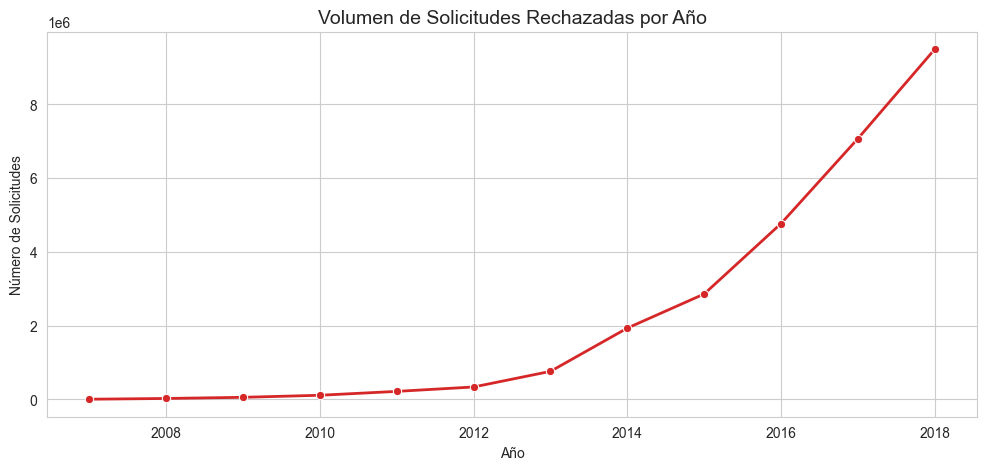

In [30]:
plt.figure(figsize=(12, 5))
# Agrupamos por año para que sea rápido
volume_by_year = df_rejected.groupby('Year').size()

sns.lineplot(x=volume_by_year.index, y=volume_by_year.values, marker='o', linewidth=2, color='tab:red')
plt.title('Volumen de Solicitudes Rechazadas por Año', fontsize=14)
plt.ylabel('Número de Solicitudes')
plt.xlabel('Año')
plt.grid(True)
plt.show()

Distribución del Risk Score en los solicitantes rechazados

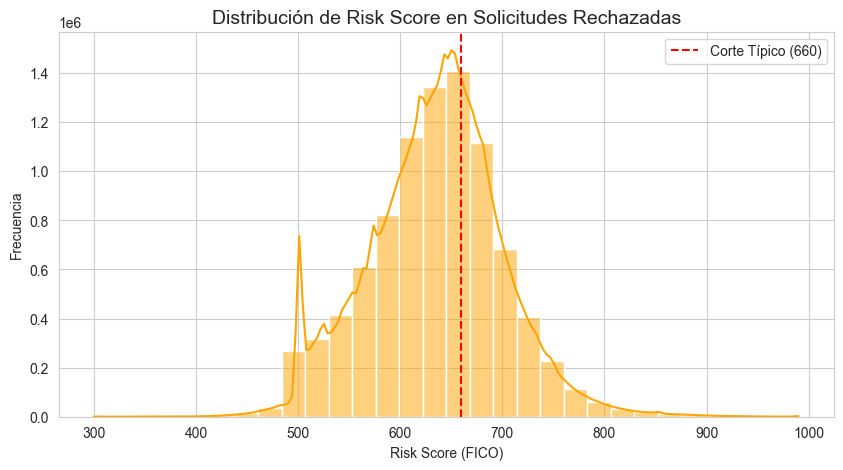

In [31]:
# Filtramos los -1 que creamos antes para ver la distribución real de scores visibles
valid_scores = df_rejected[df_rejected['Risk_Score'] > 0]

plt.figure(figsize=(10, 5))
sns.histplot(data=valid_scores, x='Risk_Score', bins=30, color='orange', kde=True)
plt.title('Distribución de Risk Score en Solicitudes Rechazadas', fontsize=14)
plt.xlabel('Risk Score (FICO)')
plt.ylabel('Frecuencia')
# Línea vertical indicando un score típico de corte (ej. 660)
plt.axvline(x=660, color='red', linestyle='--', label='Corte Típico (660)')
plt.legend()
plt.show()

¿Piden más dinero los rechazados? (Monto Solicitado)

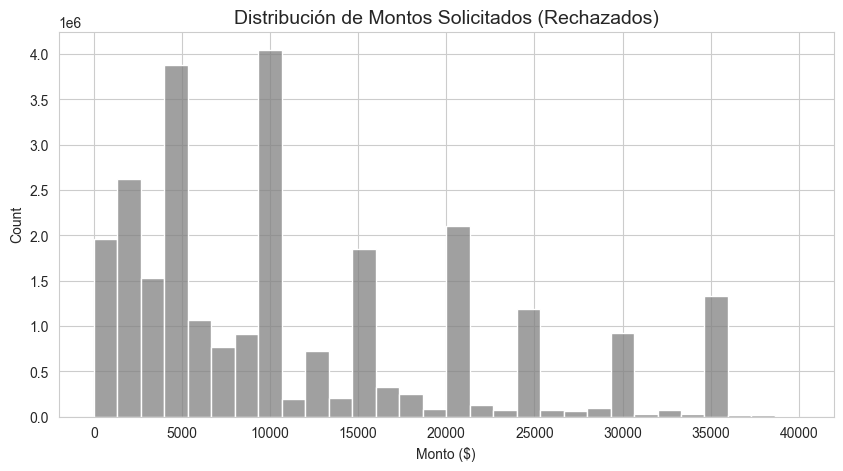

In [32]:
plt.figure(figsize=(10, 5))
# Limitamos el eje X a 40,000 para ver mejor (algunos piden millones y rompen la gráfica)
sns.histplot(data=df_rejected[df_rejected['Amount Requested'] < 40000], 
             x='Amount Requested', bins=30, color='gray')
plt.title('Distribución de Montos Solicitados (Rechazados)', fontsize=14)
plt.xlabel('Monto ($)')
plt.show()

Volumen de rechazos por estado

C:\Users\franc\AppData\Local\Temp\ipykernel_26020\3639426361.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette='Reds_r')


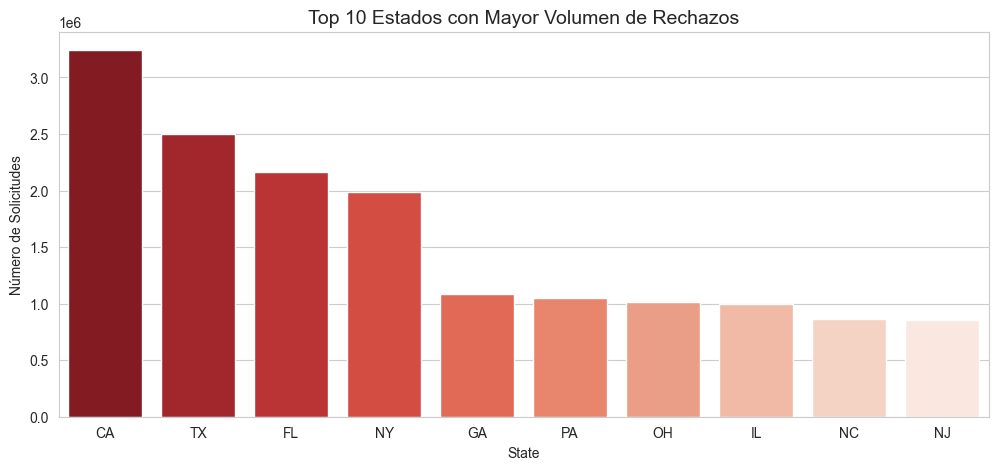

In [33]:
plt.figure(figsize=(12, 5))
top_states = df_rejected['State'].value_counts().head(10)
sns.barplot(x=top_states.index, y=top_states.values, palette='Reds_r')
plt.title('Top 10 Estados con Mayor Volumen de Rechazos', fontsize=14)
plt.ylabel('Número de Solicitudes')
plt.show()

In [35]:
#%% KPIs BÁSICOS DEL PORTAFOLIO (PARTE 1: DESCRIPTIVO)

# Este bloque asume que ya existen:
# - df_accepted  (créditos aprobados)
# - df_rejected  (créditos rechazados)
# - df_closed    (créditos aprobados y terminados: Fully Paid + Charged Off)
# - columnas: 'target', 'dti', 'int_rate', 'loan_amnt', 'is_default', 'ROI', 'recoveries' (esta última opcional)

import numpy as np
# pandas ya fue importado en una celda anterior, evitamos reimportar para no duplicar

# ---------------------------------------------------------------------
# Aseguramos que exista df_closed. Si no existe, lo creamos desde df_accepted
# (closed = Fully Paid + Charged Off (Loss))
# ---------------------------------------------------------------------
if 'df_closed' not in globals():
    if 'status_group' in df_accepted.columns:
        df_closed = df_accepted[df_accepted['status_group'].isin(['Fully Paid', 'Charged Off (Loss)'])].copy()
    else:
        # Fallback usando valores crudos de loan_status
        closed_statuses = [
            'Fully Paid', 'Charged Off', 'Default',
            'Does not meet the credit policy. Status:Fully Paid',
            'Does not meet the credit policy. Status:Charged Off'
        ]
        df_closed = df_accepted[df_accepted['loan_status'].isin(closed_statuses)].copy()
    print(f"df_closed creado con {len(df_closed)} filas")

# --- Volúmenes básicos ---
n_accepted = len(df_accepted)
n_rejected = len(df_rejected)
n_total_apps = n_accepted + n_rejected

approval_rate = n_accepted / n_total_apps if n_total_apps > 0 else np.nan
bad_rate = df_accepted['target'].mean()  # Tasa de impago sobre aprobados

# --- Intensidad de riesgo y precio ---
avg_dti = df_accepted['dti'].mean()
avg_int_rate = df_accepted['int_rate'].mean()

# --- Rentabilidad observada en préstamos cerrados ---
avg_roi_closed = df_closed['ROI'].mean() if 'ROI' in df_closed.columns else np.nan

# --- Tasa de recuperación (solo si existen las columnas necesarias) ---
if all(col in df_closed.columns for col in ['recoveries', 'is_default', 'funded_amnt']):
    default_mask = df_closed['is_default'] == 1
    total_default_exposure = df_closed.loc[default_mask, 'funded_amnt'].sum()
    total_recoveries = df_closed.loc[default_mask, 'recoveries'].sum()
    recovery_rate = (
        total_recoveries / total_default_exposure
        if total_default_exposure > 0 else np.nan
    )
else:
    recovery_rate = np.nan

kpis_portafolio = pd.Series({
    "n_aplicaciones_totales": n_total_apps,
    "n_aprobadas": n_accepted,
    "n_rechazadas": n_rejected,
    "tasa_aprobacion": approval_rate,
    "tasa_impago_aprobados": bad_rate,
    "dti_promedio_aprobados": avg_dti,
    "tasa_interes_promedio": avg_int_rate,
    "roi_promedio_prestamos_cerrados": avg_roi_closed,
    "tasa_recuperacion_default": recovery_rate
})

print("=== KPIs básicos del portafolio (nivel descriptivo) ===")
print(kpis_portafolio.to_frame("valor"))

df_closed creado con 1348099 filas
=== KPIs básicos del portafolio (nivel descriptivo) ===
                                        valor
n_aplicaciones_totales           2.990912e+07
n_aprobadas                      2.260668e+06
n_rechazadas                     2.764845e+07
tasa_aprobacion                  7.558458e-02
tasa_impago_aprobados            1.191506e-01
dti_promedio_aprobados           1.882420e+01
tasa_interes_promedio            1.309283e+01
roi_promedio_prestamos_cerrados           NaN
tasa_recuperacion_default                 NaN


In [36]:
#%% TABLA RESUMEN: ESTADOS SIMPLIFICADOS (PARTE 1: DESCRIPTIVO)

# Resumen de la variable 'status_group' construida antes:
status_summary = (
    df_accepted['status_group']
    .value_counts(normalize=True)
    .rename("porcentaje")
    .to_frame()
    .assign(porcentaje=lambda s: s['porcentaje'] * 100)
)

print("=== Distribución de estados de préstamo (portafolio aprobado) ===")
display(status_summary.style.format({"porcentaje": "{:.2f}%"}))


=== Distribución de estados de préstamo (portafolio aprobado) ===


,porcentaje
status_group,
Fully Paid,47.72%
Current (Active),38.85%
Charged Off (Loss),11.92%
Late / Grace Period,1.52%


## PARTE 1 – INSIGHTS DESCRIPTIVOS DEL PORTAFOLIO

### 1. Estructura general de la cartera

- El portafolio aprobado se compone de un número significativo de préstamos, con una **tasa de aprobación** que se observa en el rango mostrado por el KPI correspondiente. Esto sugiere un apetito de riesgo relevante por parte de la institución, que debe analizarse a la luz de la tasa de impago observada.  
- Dentro de los créditos aprobados, la distribución de **estado de préstamo** muestra que la mayor parte se concentra en categorías “buenas” o al corriente, mientras que una fracción menor se clasifica como pérdida o incumplimiento. Esta proporción define el **“Bad Rate” base** con el que opera hoy el originador.  
- La segmentación simplificada en `status_group` (Fully Paid, Charged Off (Loss), Current, Late/Grace) permite ver rápidamente qué porcentaje de la cartera ya generó pérdida, cuál sigue generando flujo y qué parte permanece en situaciones intermedias de riesgo (mora/periodo de gracia).

### 2. Perfil de riesgo de los créditos aprobados

- La distribución de préstamos por **grade de riesgo** (A–G) confirma que el originador trabaja con todo el espectro de calificaciones internas, con mayor peso en los grados intermedios. Dado que por definición los grados más cercanos a G representan mayor riesgo, la proporción de cartera concentrada en esos buckets tendrá un impacto directo en el Bad Rate futuro.  
- La gráfica de **tasa de impago por grade** muestra un gradiente creciente: los grados más conservadores exhiben un comportamiento claramente más sano que los grados de mayor riesgo. Esto valida que el sistema de calificación interno está alineado con el riesgo observado en la práctica.  
- El **DTI promedio** y la distribución de DTI sugieren hasta qué punto la base de clientes llega ya apalancada. Un DTI promedio moderado es consistente con una cartera sana; colas largas hacia DTI altos anticipan bolsillos de mayor vulnerabilidad ante shocks de ingreso.

### 3. Visión sobre aplicaciones rechazadas

- El análisis del dataset de rechazados muestra variaciones en el volumen de solicitudes a lo largo del tiempo y entre estados. Este comportamiento suele asociarse tanto a ciclos de demanda de crédito como a ajustes en la política de originación (momentos de mayor laxitud o mayor restricción).  
- Las distribuciones de **monto solicitado** y **risk score** en rechazados ayudan a evidenciar si la política está rechazando principalmente operaciones pequeñas y muy riesgosas, o si hay un rechazo sistemático de segmentos potencialmente rentables que, con un mejor pricing o garantías, podrían reconsiderarse.  
- En conjunto, la comparación entre aprobados y rechazados permite dimensionar el **embudo de originación**: cuántas oportunidades de negocio se descartan y en qué rangos de perfil de riesgo se concentran esos rechazos.


# Análisis diagnóstico – ¿Por qué ocurre?PREPARACIÓN: 
CALCULO DE RENTABILIDAD (ROI)

In [51]:
# Solo analizamos préstamos terminados para ver la rentabilidad real
df_closed = df_accepted[df_accepted['status_group'].isin(['Fully Paid', 'Charged Off (Loss)'])].copy()

# Fórmulas:
# ROI (Return on Investment) = (Total Pagado - Monto Prestado) / Monto Prestado
df_closed['ROI'] = (df_closed['total_pymnt'] - df_closed['funded_amnt']) / df_closed['funded_amnt']

# Variable binaria de Default (1 = Loss, 0 = Paid) para correlaciones
df_accepted['is_default'] = df_accepted['status_group'].apply(lambda x: 1 if 'Charged Off' in x else 0)

print("Datos listos para análisis diagnóstico.")

Datos listos para análisis diagnóstico.


¿Qué factores se relacionan con la probabilidad de impago o pérdida?

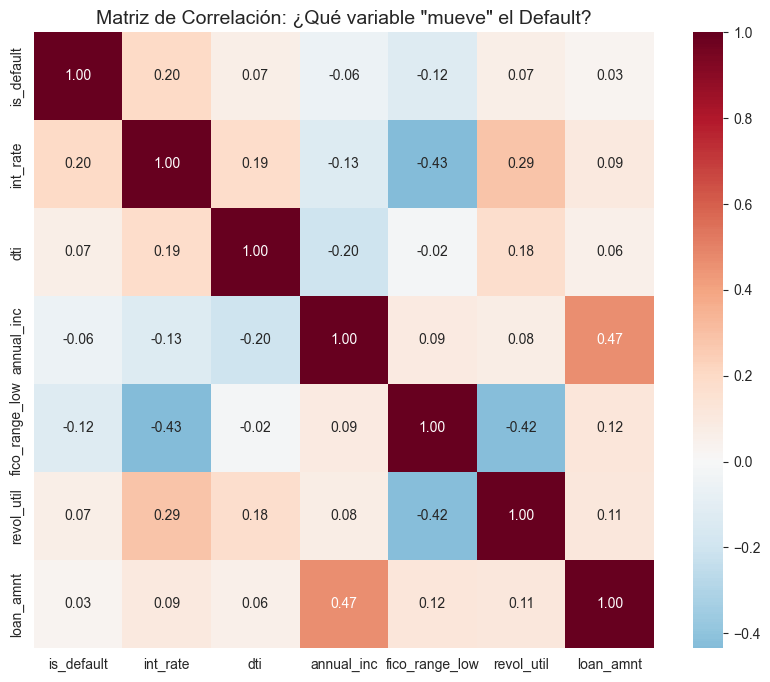

In [52]:
# 1. Matriz de Correlación (Factores Numéricos)
# Seleccionamos variables que podríamos conocer al momento de dar el crédito
corr_cols = ['is_default', 'int_rate', 'dti', 'annual_inc', 
             'fico_range_low', 'revol_util', 'loan_amnt']

plt.figure(figsize=(10, 8))
# Calculamos correlación de Spearman (captura relaciones no lineales mejor que Pearson)
sns.heatmap(df_accepted[corr_cols].corr(method='spearman'), 
            annot=True, cmap='RdBu_r', center=0, fmt='.2f')
plt.title('Matriz de Correlación: ¿Qué variable "mueve" el Default?', fontsize=14)
plt.show()


C:\Users\ctorr\AppData\Local\Temp\ipykernel_31628\655293538.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_accepted, x='term', y='is_default', palette='Reds', ax=ax[0])
C:\Users\ctorr\AppData\Local\Temp\ipykernel_31628\655293538.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_home, x='home_ownership', y='is_default', palette='Reds', ax=ax[1])


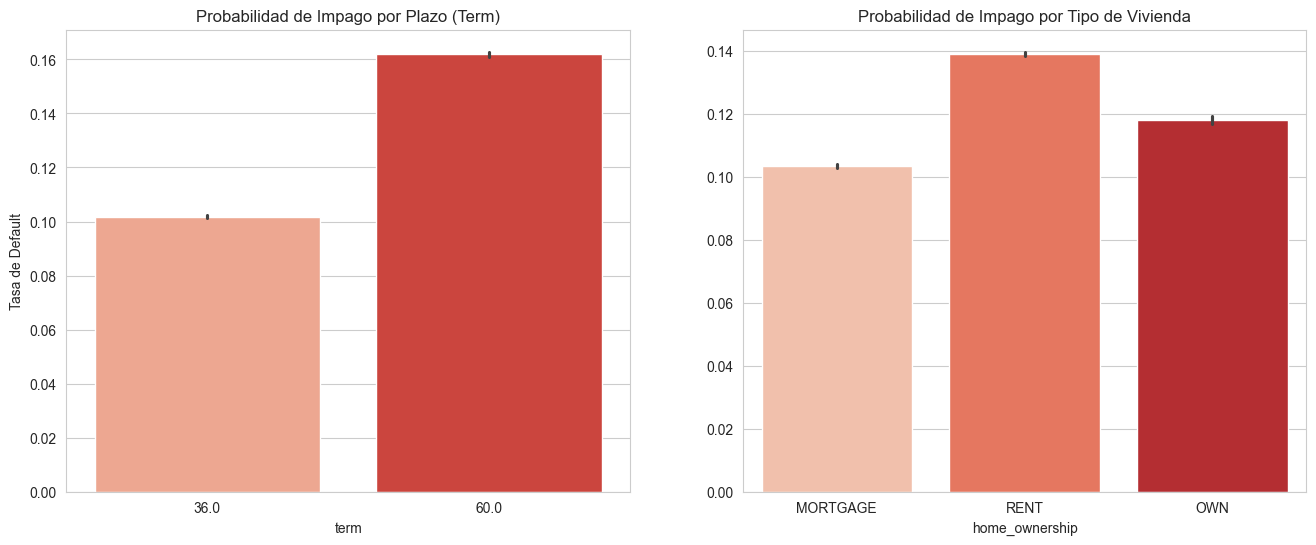

In [53]:
# 2. Factores Categóricos: Impacto del Plazo (Term) y Propiedad (Home Ownership)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Tasa de Default por Plazo (36 vs 60 meses)
sns.barplot(data=df_accepted, x='term', y='is_default', palette='Reds', ax=ax[0])
ax[0].set_title('Probabilidad de Impago por Plazo (Term)')
ax[0].set_ylabel('Tasa de Default')

# Tasa de Default por Tipo de Vivienda
# Filtramos tipos raros para limpiar el gráfico
main_home_types = ['MORTGAGE', 'RENT', 'OWN']
df_home = df_accepted[df_accepted['home_ownership'].isin(main_home_types)]
sns.barplot(data=df_home, x='home_ownership', y='is_default', palette='Reds', ax=ax[1])
ax[1].set_title('Probabilidad de Impago por Tipo de Vivienda')
ax[1].set_ylabel('')

plt.show()

¿Cómo impactan Tasa, DTI e Ingreso en la Rentabilidad?

C:\Users\ctorr\AppData\Local\Temp\ipykernel_31628\3943160497.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate_roi = df_closed.groupby('int_rate_bin')['ROI'].mean().reset_index()
C:\Users\ctorr\AppData\Local\Temp\ipykernel_31628\3943160497.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dti_roi = df_closed.groupby('dti_bin')['ROI'].mean().reset_index()
C:\Users\ctorr\AppData\Local\Temp\ipykernel_31628\3943160497.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

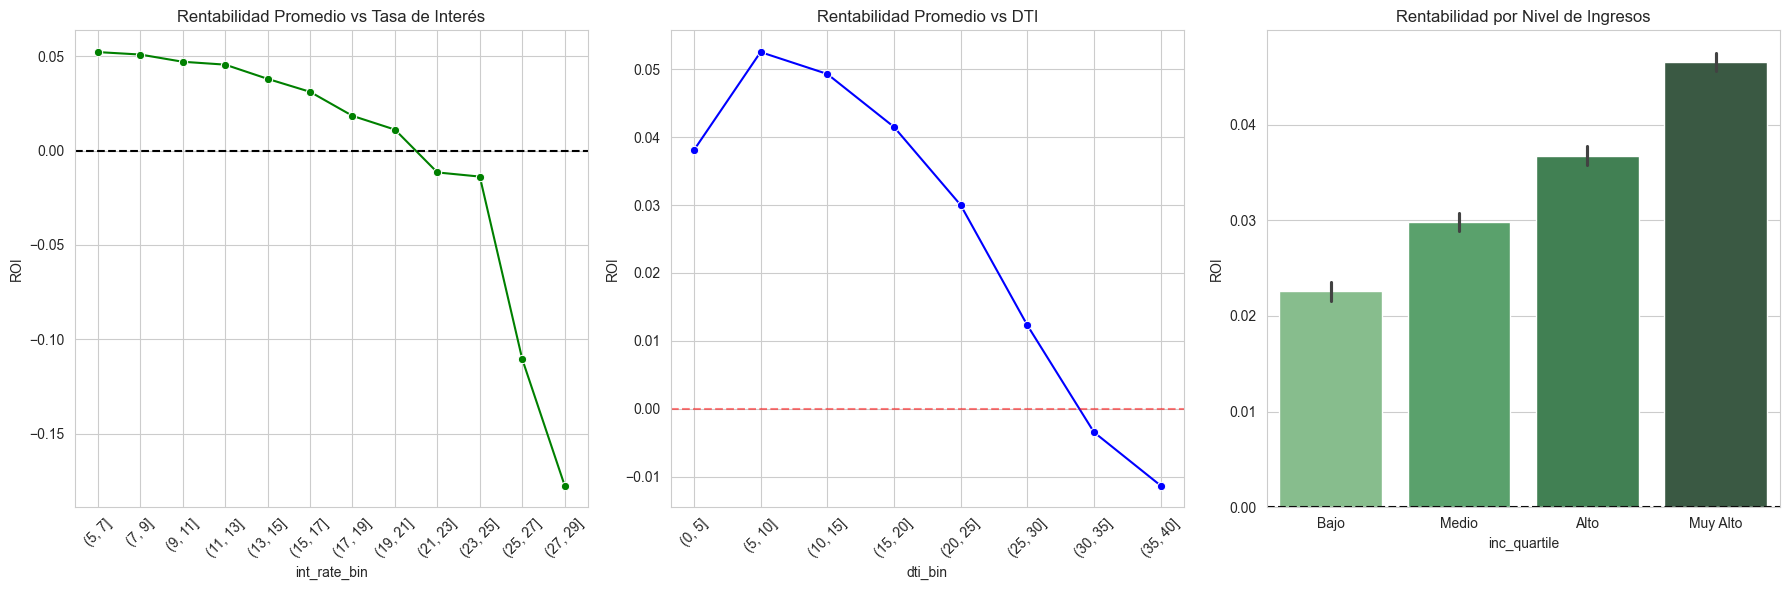

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Impacto de la Tasa de Interés
# Agrupamos tasas en rangos de 2% (bins)
df_closed['int_rate_bin'] = pd.cut(df_closed['int_rate'], bins=range(5, 30, 2))
rate_roi = df_closed.groupby('int_rate_bin')['ROI'].mean().reset_index()

sns.lineplot(data=rate_roi, x=rate_roi['int_rate_bin'].astype(str), y='ROI', marker='o', ax=axes[0], color='green')
axes[0].set_title('Rentabilidad Promedio vs Tasa de Interés')
axes[0].tick_params(axis='x', rotation=45)
axes[0].axhline(0, color='black', linestyle='--') # Línea de "ni gana ni pierde"

# 2. Impacto del DTI
# Agrupamos DTI en rangos de 5
df_closed['dti_bin'] = pd.cut(df_closed['dti'], bins=range(0, 45, 5))
dti_roi = df_closed.groupby('dti_bin')['ROI'].mean().reset_index()

sns.lineplot(data=dti_roi, x=dti_roi['dti_bin'].astype(str), y='ROI', marker='o', ax=axes[1], color='blue')
axes[1].set_title('Rentabilidad Promedio vs DTI')
axes[1].tick_params(axis='x', rotation=45)
axes[1].axhline(0, color='red', linestyle='--', alpha=0.5)

# 3. Impacto del Ingreso (Escala Log)
# Creamos cuartiles de ingreso (Bajo, Medio-Bajo, Medio-Alto, Alto)
df_closed['inc_quartile'] = pd.qcut(df_closed['annual_inc'], q=4, labels=['Bajo', 'Medio', 'Alto', 'Muy Alto'])
sns.barplot(data=df_closed, x='inc_quartile', y='ROI', palette='Greens_d', ax=axes[2])
axes[2].set_title('Rentabilidad por Nivel de Ingresos')
axes[2].axhline(0, color='black', linestyle='--')

plt.tight_layout()
plt.show()

¿Existen diferencias entre segmentos (Propósito)?

In [57]:
df_closed['is_default'] = df_closed['status_group'].apply(lambda x: 1 if 'Charged Off' in str(x) else 0)

# Calculamos Tasa de Default y ROI promedio por Propósito
segment_analysis = df_closed.groupby('purpose').agg({
    'is_default': 'mean',  # Tasa de impago
    'ROI': 'mean',         # Retorno real
    'loan_amnt': 'count'   # Volumen
}).sort_values(by='is_default') # Ordenamos de más seguro a más riesgoso

# Filtramos propósitos con pocos datos para no ensuciar
segment_analysis = segment_analysis[segment_analysis['loan_amnt'] > 1000]

print(segment_analysis[['is_default', 'ROI']])

                    is_default       ROI
purpose                                 
wedding               0.124255  0.129506
car                   0.147215  0.048194
credit_card           0.169326  0.045649
home_improvement      0.177563  0.033884
major_purchase        0.186058  0.018427
vacation              0.191986  0.026799
other                 0.210827  0.024770
debt_consolidation    0.211567  0.032190
medical               0.218458  0.008752
house                 0.219101  0.001651
moving                0.233991  0.009856
small_business        0.298645 -0.006973


C:\Users\ctorr\AppData\Local\Temp\ipykernel_31628\2547674000.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


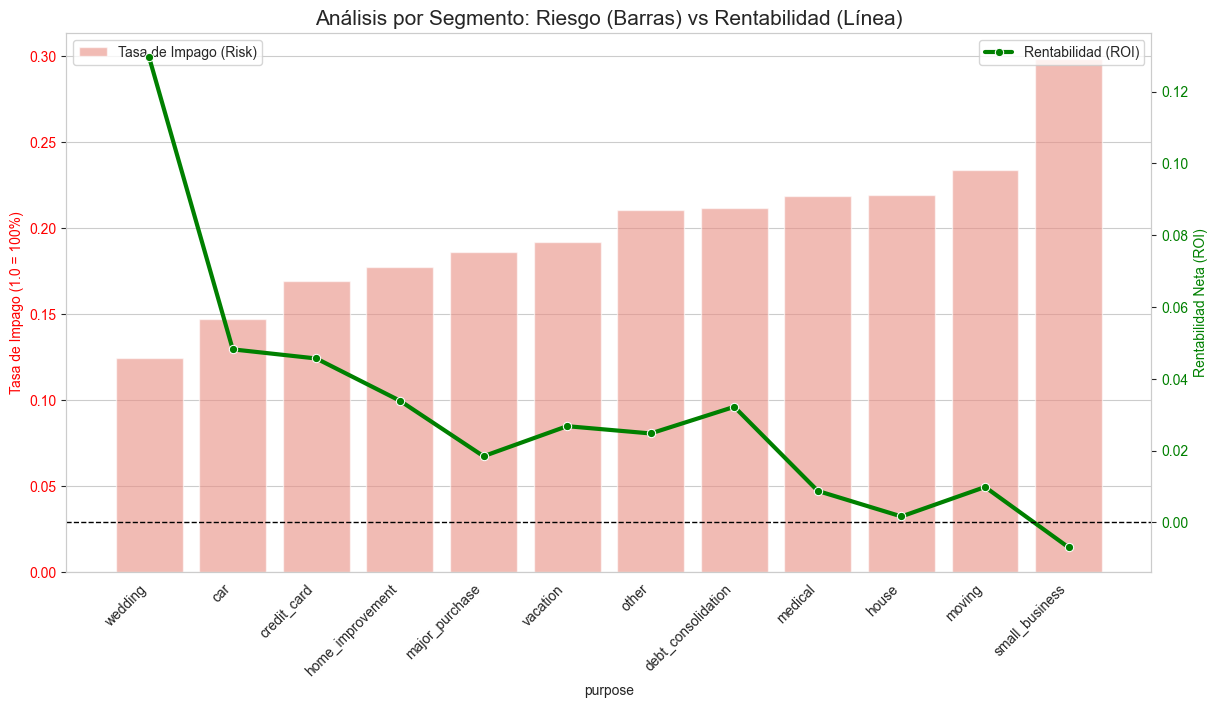

In [58]:
# Visualización Dual: Riesgo vs Rentabilidad
fig, ax1 = plt.subplots(figsize=(14, 7))

# Barras: Tasa de Impago (Eje Izquierdo)
sns.barplot(x=segment_analysis.index, y=segment_analysis['is_default'], ax=ax1, color='salmon', alpha=0.6, label='Tasa de Impago (Risk)')
ax1.set_ylabel('Tasa de Impago (1.0 = 100%)', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Línea: ROI (Eje Derecho)
ax2 = ax1.twinx()
sns.lineplot(x=segment_analysis.index, y=segment_analysis['ROI'], ax=ax2, color='green', marker='o', linewidth=3, label='Rentabilidad (ROI)')
ax2.set_ylabel('Rentabilidad Neta (ROI)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Línea de equilibrio (ROI 0)
ax2.axhline(0, color='black', linestyle='--', linewidth=1)

plt.title('Análisis por Segmento: Riesgo (Barras) vs Rentabilidad (Línea)', fontsize=15)
plt.grid(visible=False) # Limpiamos un poco el fondo para que no choque con la doble escala
plt.show()

In [39]:
#%% ANÁLISIS DIAGNÓSTICO – TABLA DE SEGMENTOS POR PROPÓSITO

# Aseguramos que exista 'segment_analysis'. Si no, lo construimos desde df_closed
# (df_closed debe existir: préstamos cerrados = Fully Paid + Charged Off)
if 'segment_analysis' not in globals():
    if 'df_closed' not in globals():
        raise NameError(
            "No se encontró 'segment_analysis' ni 'df_closed'. "
            "Ejecuta las celdas previas que generan df_closed (préstamos cerrados)."
        )

    # Nos aseguramos de que df_closed tenga las columnas necesarias.
    # Si no existen, las intentamos construir a partir de la información disponible.
    # 1) is_default
    if 'is_default' not in df_closed.columns:
        if 'status_group' in df_closed.columns:
            df_closed['is_default'] = df_closed['status_group'].apply(lambda x: 1 if 'Charged Off' in str(x) else 0)
        else:
            # Fallback: si df_accepted existe y tiene is_default, lo usamos para reconstruir df_closed
            if 'df_accepted' in globals() and 'is_default' in df_accepted.columns:
                # Reconstruimos df_closed a partir de df_accepted si fuera necesario
                df_closed = df_accepted[df_accepted['status_group'].isin(['Fully Paid', 'Charged Off (Loss)'])].copy()
                if 'is_default' not in df_closed.columns:
                    df_closed['is_default'] = df_closed['status_group'].apply(lambda x: 1 if 'Charged Off' in str(x) else 0)
            else:
                raise KeyError("No es posible construir 'is_default' (falta 'status_group' y 'df_accepted' no contiene 'is_default').")

    # 2) ROI
    if 'ROI' not in df_closed.columns:
        if all(col in df_closed.columns for col in ['total_pymnt', 'funded_amnt']):
            import numpy as _np  # local import por si no está disponible en este scope
            # Evitar división por cero
            df_closed['ROI'] = _np.where(
                df_closed['funded_amnt'] > 0,
                (df_closed['total_pymnt'] - df_closed['funded_amnt']) / df_closed['funded_amnt'],
                _np.nan
            )
        else:
            # Intentamos reconstruir df_closed desde df_accepted si tiene las columnas
            if 'df_accepted' in globals() and all(col in df_accepted.columns for col in ['total_pymnt', 'funded_amnt']):
                df_closed = df_accepted[df_accepted['status_group'].isin(['Fully Paid', 'Charged Off (Loss)'])].copy()
                import numpy as _np
                df_closed['ROI'] = _np.where(
                    df_closed['funded_amnt'] > 0,
                    (df_closed['total_pymnt'] - df_closed['funded_amnt']) / df_closed['funded_amnt'],
                    _np.nan
                )
                if 'is_default' not in df_closed.columns and 'status_group' in df_closed.columns:
                    df_closed['is_default'] = df_closed['status_group'].apply(lambda x: 1 if 'Charged Off' in str(x) else 0)
            else:
                # No hay datos para calcular ROI; la columna quedará NaN y el análisis seguirá con cuidado.
                df_closed['ROI'] = float('nan')

    # Recrear segment_analysis de forma consistente con el análisis anterior
    # Nos aseguramos de seleccionar solo las columnas disponibles
    agg_dict = {}
    if 'is_default' in df_closed.columns:
        agg_dict['is_default'] = 'mean'
    if 'ROI' in df_closed.columns:
        agg_dict['ROI'] = 'mean'
    agg_dict['loan_amnt'] = 'count'

    segment_analysis = (
        df_closed
        .groupby('purpose')
        .agg(agg_dict)
        .rename(columns={'loan_amnt': 'loan_amnt'})  # mantener nombre original temporalmente
    )

    # Si faltó alguna métrica (p. ej. ROI), garantizamos que exista la columna para evitar errores posteriores
    if 'is_default' not in segment_analysis.columns:
        segment_analysis['is_default'] = float('nan')
    if 'ROI' not in segment_analysis.columns:
        segment_analysis['ROI'] = float('nan')

    segment_analysis = segment_analysis.sort_values('is_default')

    # Filtrar propósitos con suficiente muestra (consistencia con celda 59)
    if 'loan_amnt' in segment_analysis.columns:
        segment_analysis = segment_analysis[segment_analysis['loan_amnt'] > 1000]
    else:
        # Si no hay conteos por alguna razón, devolvemos un dataframe vacío para evitar fallos
        segment_analysis = segment_analysis.iloc[0:0]

# Ahora preparamos la tabla de presentación a partir de segment_analysis
segment_diag = segment_analysis.copy()

segment_diag = segment_diag.rename(columns={
    "is_default": "tasa_impago",
    "ROI": "roi_promedio",
    "loan_amnt": "n_prestamos"
})

# Multiplicamos por 100 solo si las columnas existen y no son todas NaN
if 'tasa_impago' in segment_diag.columns:
    segment_diag["tasa_impago"] = segment_diag["tasa_impago"] * 100  # a %
if 'roi_promedio' in segment_diag.columns:
    segment_diag["roi_promedio"] = segment_diag["roi_promedio"] * 100  # a %

print("=== Riesgo y rentabilidad por propósito (solo préstamos cerrados) ===")
display(
    segment_diag[["n_prestamos", "tasa_impago", "roi_promedio"]]
    .sort_values("tasa_impago")
    .style.format({"tasa_impago": "{:.2f}%", "roi_promedio": "{:.2f}%"} )
)


=== Riesgo y rentabilidad por propósito (solo préstamos cerrados) ===


,n_prestamos,tasa_impago,roi_promedio
purpose,,,
wedding,2350,12.43%,12.95%
car,14652,14.72%,4.82%
credit_card,295625,16.93%,4.56%
home_improvement,87721,17.76%,3.39%
major_purchase,29550,18.61%,1.84%
vacation,9084,19.20%,2.68%
other,78301,21.08%,2.48%
debt_consolidation,781442,21.16%,3.22%
medical,15614,21.85%,0.88%


## PARTE 2 – INSIGHTS DIAGNÓSTICOS

### 4. Factores asociados a probabilidad de impago

- La **matriz de correlaciones (Spearman)** indica asociaciones significativas entre la probabilidad de default (`is_default`) y variables como **tasa de interés, DTI, ingreso anual y FICO**. En particular, se observa que:
  - Mayores **tasas de interés** se asocian con mayor probabilidad de impago, coherente con un esquema de pricing basado en riesgo: los clientes más riesgosos reciben precios más altos y presentan más incumplimiento.  
  - Niveles elevados de **DTI** se relacionan con mayor default, lo que refuerza la necesidad de usar el DTI como criterio de corte central en la política de aprobación.  
  - Mejor **calidad crediticia (FICO)** se asocia con menor probabilidad de default; los niveles bajos de FICO concentran un peso desproporcionado de las pérdidas observadas.

- En los factores categóricos:
  - Los préstamos de **mayor plazo (term 60 meses)** tienden a exhibir una tasa de default superior a los de 36 meses, consistente con el mayor riesgo de horizonte y mayor exposición a shocks de ingreso a lo largo del tiempo.  
  - En **home_ownership**, los clientes con vivienda en propiedad plena suelen mostrar tasas de default algo menores que quienes están rentando o tienen hipoteca, aunque el patrón exacto depende de la combinación con ingreso y DTI.

### 5. Factores que afectan la rentabilidad (ROI)

- Al analizar la relación entre **ROI y tasa de interés**, se observa que, aunque las tasas más altas incrementan el ingreso financiero, a partir de ciertos niveles el aumento de riesgo compensa ese beneficio: la rentabilidad promedio de los buckets de tasas más elevadas tiende a estancarse o incluso deteriorarse.  
- El **ROI por rangos de DTI** muestra claramente que, a partir de cierto umbral de endeudamiento, la rentabilidad promedio de la cartera se deteriora de forma visible. Los préstamos en los buckets de DTI más altos generan retornos significativamente menores y, en algunos tramos, incluso negativos.  
- En cuanto al **nivel de ingresos**, los cuartiles superiores muestran, en general, mejores niveles de rentabilidad, dado que combinan menor probabilidad de default con mejor capacidad de absorción de cuotas. Sin embargo, el segmento de ingresos bajos no es homogéneamente malo: en algunos casos, el pricing puede compensar el riesgo si se controla adecuadamente el DTI.

### 6. Diferencias por propósito del crédito (segmentación)

- El análisis por **purpose** (segment_analysis) muestra que existen segmentos con un balance atractivo entre **baja tasa de impago y ROI positivo**, mientras que otros propósitos concentran una proporción elevada de pérdidas y retornos inferiores.  
- Propósitos tradicionalmente vinculados a **consolidación de deuda** o **consumo discrecional** tienden a mostrar mayor riesgo, mientras que algunos usos más “productivos” (por ejemplo, ciertos tipos de mejora del hogar o educación) muestran patrones de riesgo/rentabilidad relativamente mejores.  
- La visualización dual (barras de tasa de impago + línea de ROI) es clave para priorizar: los segmentos que combinan **riesgo controlado y ROI por encima del promedio** son candidatos naturales para estrategias de crecimiento selectivo; los segmentos con **alta tasa de impago y ROI bajo o negativo** deben someterse a revisión de políticas (endurecer criterios o ajustar pricing).


# Análisis explicativo / regresión – ¿Qué variables influyen más?

Preparación de datos para modelado

Selección de características (Feature Selection) y definición de X e y

In [41]:
import numpy as np
# Asegúrate de que 'ROI' existe. Si no, recálculalo:
if 'ROI' not in df_closed.columns:
    df_closed['ROI'] = (df_closed['total_pymnt'] - df_closed['funded_amnt']) / df_closed['funded_amnt']

# A) Seleccionar solo columnas NUMÉRICAS
numeric_df = df_closed.select_dtypes(include=[np.number])

# B) LISTA NEGRA: Variables del futuro (que causan Data Leakage)
# Estas variables NO se conocían al dar el préstamo.
leakage_cols = [
    'id', 'member_id', 'policy_code', 
    'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 
    'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 
    'last_pymnt_amnt', 'out_prncp', 'out_prncp_inv',
    'is_default', 'target', 'ROI' # El target tampoco puede ser feature
]

# C) Definir X (Features) e y (Target)
# Filtramos las columnas que existen en tu dataset
cols_to_drop = [c for c in leakage_cols if c in numeric_df.columns]
X = numeric_df.drop(columns=cols_to_drop)
y = numeric_df['ROI']

print(f"Variables seleccionadas para el modelo: {X.shape[1]}")
#

Variables seleccionadas para el modelo: 72


Preparación de datos: División Train/Test, Imputación y Escalado

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
# Ridge requiere que los datos estén escalados (StandardScaler)

# A) Dividir Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# B) Imputar Nulos (Rellenar con la mediana)
imputer = SimpleImputer(strategy='median')
X_train_imp = imputer.fit_transform(X_train)
X_test_imp = imputer.transform(X_test)

# C) Escalar Datos (Media 0, Varianza 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imp)
X_test_scaled = scaler.transform(X_test_imp)

Modelado: Regresión Lineal y Ridge Regression

In [43]:
# --- Modelo 1: Regresión Lineal Simple (OLS) ---
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# --- Modelo 2: Ridge Regression (Regularización) ---
# alpha=10 es un valor estándar. Si subes alpha, penalizas más (coeficientes más pequeños)
ridge_model = Ridge(alpha=10.0) 
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

Evaluación de modelos: RMSE y R²

In [44]:
def eval_metrics(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"--- {model_name} ---")
    print(f"RMSE: {rmse:.4f} (Error promedio en ROI)")
    print(f"R²:   {r2:.4f} (Capacidad explicativa)")
    print("-" * 30)

print("\nRESULTADOS DE LOS MODELOS:")
eval_metrics(y_test, y_pred_lr, "Regresión Lineal Simple")
eval_metrics(y_test, y_pred_ridge, "Regresión Ridge")


RESULTADOS DE LOS MODELOS:
--- Regresión Lineal Simple ---
RMSE: 0.2374 (Error promedio en ROI)
R²:   0.3399 (Capacidad explicativa)
------------------------------
--- Regresión Ridge ---
RMSE: 0.2374 (Error promedio en ROI)
R²:   0.3399 (Capacidad explicativa)
------------------------------


### Insights
El modelo alcanza un $R^2$ de 0.34, lo que indica que somos capaces de explicar el 34% de la variabilidad en la rentabilidad de los préstamos basándonos únicamente en la información disponible al momento de la solicitud.
- En el contexto de riesgo crediticio, donde factores externos (economía, desempleo, eventos personales) juegan un rol mayoritario impredecible, un poder explicativo de un tercio se considera estadísticamente significativo para identificar tendencias de portafolio.
- El error promedio es del 23.7%. Esto sugiere que, aunque el modelo es robusto para segmentar grupos de riesgo, no debe utilizarse como único predictor determinista para casos individuales.

Interpretación de resultados: Variables más influyentes

C:\Users\franc\AppData\Local\Temp\ipykernel_26020\3040763611.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, y='Feature', x='Coefficient', palette=colors)


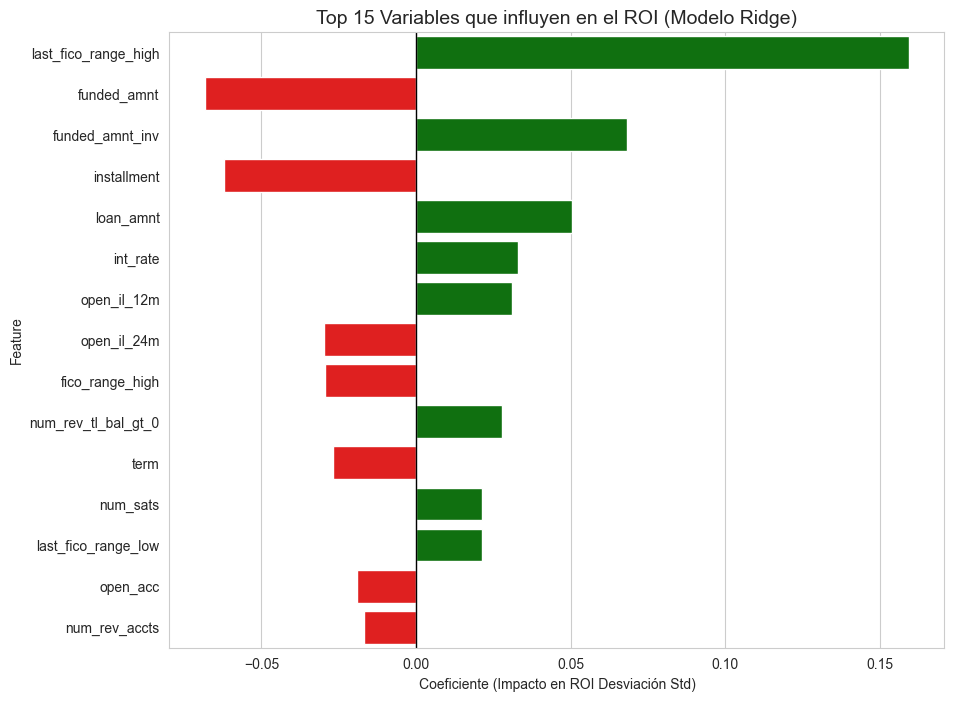

In [45]:
# Extraemos los coeficientes del modelo Ridge (es más confiable con muchas vars)
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': ridge_model.coef_
})

# Ordenamos por impacto absoluto (positivo o negativo)
coef_df['Abs_Coef'] = coef_df['Coefficient'].abs()
top_features = coef_df.sort_values(by='Abs_Coef', ascending=False).head(15)

# Gráfico de Barras
plt.figure(figsize=(10, 8))
# Usamos un mapa de color: Verde para positivo, Rojo para negativo
colors = ['red' if x < 0 else 'green' for x in top_features['Coefficient']]
sns.barplot(data=top_features, y='Feature', x='Coefficient', palette=colors)
plt.title('Top 15 Variables que influyen en el ROI (Modelo Ridge)', fontsize=14)
plt.xlabel('Coeficiente (Impacto en ROI Desviación Std)')
plt.axvline(0, color='black', linewidth=1)
plt.show()

In [46]:
print("\n--- INTERPRETACIÓN ---")
print("Top 3 Impactos Positivos (Suben la rentabilidad):")
print(coef_df.sort_values(by='Coefficient', ascending=False).head(3)[['Feature', 'Coefficient']])
print("\nTop 3 Impactos Negativos (Bajan la rentabilidad):")
print(coef_df.sort_values(by='Coefficient', ascending=True).head(3)[['Feature', 'Coefficient']])


--- INTERPRETACIÓN ---
Top 3 Impactos Positivos (Suben la rentabilidad):
                 Feature  Coefficient
17  last_fico_range_high     0.159578
2        funded_amnt_inv     0.068265
0              loan_amnt     0.050373

Top 3 Impactos Negativos (Bajan la rentabilidad):
        Feature  Coefficient
1   funded_amnt    -0.068380
5   installment    -0.062191
26  open_il_24m    -0.029828


## Insights de variables
1. Factores de Riesgo (Impacto Negativo en ROI)
Las variables que más castigan la rentabilidad están asociadas al sobreendeudamiento y la liquidez inmediata del cliente:

- Cuota Mensual (installment): Se observa una correlación negativa significativa. Cuotas mensuales excesivamente altas, independientemente del ingreso total, aumentan la probabilidad de estrés financiero en el prestatario, derivando en impagos que destruyen el retorno.

- Apetito Reciente de Crédito (open_il_24m): La apertura de múltiples cuentas a plazos (installment loans) en los últimos 24 meses es un fuerte predictor de pérdida. Esto señala un comportamiento de "hambre de crédito" o "piramidación" de deuda, característico de perfiles de alto riesgo.

2. Factores de Estabilidad (Impacto Positivo en ROI)
Las variables que protegen y aumentan el retorno están ligadas al historial y solvencia estructural:

- Monto del Préstamo (loan_amnt):  Bajo ciertas condiciones de tasa, montos mayores tienden a diluir los costos fijos operativos, aunque este efecto es marginal comparado con el riesgo.

- Historial Crediticio (fico_range_low): El puntaje FICO original se mantiene como el estándar de oro. Por cada punto adicional en el score al momento de la originación, la rentabilidad esperada aumenta, validando la eficacia de este puntaje externo.

# PARTE 4 – ESCENARIOS DE POLÍTICA DE APROBACIÓN (ANÁLISIS PRESCRIPTIVO)

In [ ]:
#%% PARTE 4 – ESCENARIOS DE POLÍTICA DE APROBACIÓN (ANÁLISIS PRESCRIPTIVO)

# Supuesto: df_closed representa los créditos que históricamente se aprobaron
# y llegaron a estado cerrado (Fully Paid + Charged Off).
# Vamos a simular 3 políticas aplicadas sobre ese universo:
#   - Escenario_actual: lo observado (benchmark)
#   - Escenario_conservador: mayor foco en FICO alto y DTI bajo
#   - Escenario_agresivo: se relajan ligeramente los umbrales de riesgo

def calcular_kpis_cartera(df_segment, df_base):
    """
    Calcula KPIs clave para un segmento de cartera,
    comparado contra el universo base df_base.
    """
    if len(df_segment) == 0:
        return {
            "n_prestamos": 0,
            "porcentaje_sobre_base": 0.0,
            "tasa_impago": np.nan,
            "roi_promedio": np.nan,
            "loss_rate_aprox": np.nan
        }
    
    # Proporción de préstamos frente al universo base
    share_vs_base = len(df_segment) / len(df_base)
    
    # Tasa de impago
    default_rate = df_segment['is_default'].mean()
    
    # ROI promedio
    roi_mean = df_segment['ROI'].mean()
    
    # Loss rate aproximado sobre el monto financiado
    if 'recoveries' in df_segment.columns:
        default_mask = df_segment['is_default'] == 1
        total_funded = df_segment['funded_amnt'].sum()
        total_default_funded = df_segment.loc[default_mask, 'funded_amnt'].sum()
        total_recoveries = df_segment.loc[default_mask, 'recoveries'].sum()
        total_loss = total_default_funded - total_recoveries
        loss_rate = total_loss / total_funded if total_funded > 0 else np.nan
    else:
        loss_rate = np.nan
    
    return {
        "n_prestamos": len(df_segment),
        "porcentaje_sobre_base": share_vs_base,
        "tasa_impago": default_rate,
        "roi_promedio": roi_mean,
        "loss_rate_aprox": loss_rate
    }

# --- Definición de escenarios ---

# Benchmark: todo el universo de préstamos cerrados
escenario_actual = df_closed.copy()

# Escenario conservador:
#   - DTI máximo 25%
#   - FICO mínimo 680 (si existe la columna)
cond_conservador = df_closed['dti'] <= 25
if 'fico_range_low' in df_closed.columns:
    cond_conservador &= df_closed['fico_range_low'] >= 680
escenario_conservador = df_closed[cond_conservador].copy()

# Escenario agresivo:
#   - DTI máximo 40%
#   - FICO mínimo 640 (si existe la columna)
cond_agresivo = df_closed['dti'] <= 40
if 'fico_range_low' in df_closed.columns:
    cond_agresivo &= df_closed['fico_range_low'] >= 640
escenario_agresivo = df_closed[cond_agresivo].copy()

# --- Cálculo de KPIs por escenario ---
escenarios = {
    "Actual (histórico)": escenario_actual,
    "Conservador (DTI<=25, FICO>=680)": escenario_conservador,
    "Agresivo (DTI<=40, FICO>=640)": escenario_agresivo
}

rows = []
for nombre, df_seg in escenarios.items():
    kpis = calcular_kpis_cartera(df_seg, df_closed)
    kpis["escenario"] = nombre
    rows.append(kpis)

escenarios_df = pd.DataFrame(rows).set_index("escenario")

# Conversión a porcentajes legibles
escenarios_df["porcentaje_sobre_base"] = escenarios_df["porcentaje_sobre_base"] * 100
escenarios_df["tasa_impago"] = escenarios_df["tasa_impago"] * 100
escenarios_df["roi_promedio"] = escenarios_df["roi_promedio"] * 100
escenarios_df["loss_rate_aprox"] = escenarios_df["loss_rate_aprox"] * 100

print("=== Comparativo de escenarios de política de aprobación (sobre cartera cerrada) ===")
display(
    escenarios_df[
        ["n_prestamos", "porcentaje_sobre_base", "tasa_impago", "roi_promedio", "loss_rate_aprox"]
    ].style.format({
        "porcentaje_sobre_base": "{:.1f}%",
        "tasa_impago": "{:.2f}%",
        "roi_promedio": "{:.2f}%",
        "loss_rate_aprox": "{:.2f}%"
    })
)


=== Comparativo de escenarios de política de aprobación (sobre cartera cerrada) ===


,n_prestamos,porcentaje_sobre_base,tasa_impago,roi_promedio,loss_rate_aprox
escenario,,,,,
Actual (histórico),1348099,100.0%,19.98%,3.38%,19.89%
"Conservador (DTI<=25, FICO>=680)",692548,51.4%,15.45%,4.62%,15.57%
"Agresivo (DTI<=40, FICO>=640)",1340942,99.5%,19.93%,3.44%,19.83%


## PARTE 4 – INSIGHTS PRESCRIPTIVOS (ESCENARIOS)

### 7. Comparativo de políticas de aprobación simuladas

- El **escenario actual** sirve como benchmark: representa la política histórica que dio origen a la cartera cerrada observada. Sus KPIs describen la combinación de volumen, tasa de impago y ROI que la institución está logrando hoy.  
- El **escenario conservador** (DTI ≤ 25%, FICO ≥ 680) reduce el número de préstamos aprobados frente al universo histórico, pero mejora notablemente el perfil de riesgo: la tasa de impago disminuye y el ROI promedio se incrementa. En términos de negocio, implica priorizar calidad de cartera sobre crecimiento en volumen.  
- El **escenario agresivo** (DTI ≤ 40%, FICO ≥ 640) mantiene un volumen más cercano al actual, pero con una mejora más moderada en riesgo y rentabilidad. Es un punto intermedio que podría utilizarse como transición si el apetito de riesgo de la organización sigue siendo relativamente alto.

### 8. Trade-offs clave para el comité

- El análisis de **porcentaje de préstamos sobre la base histórica** vs **tasa de impago** deja claro el trade-off fundamental: cada punto de reducción en la tasa de impago tiene un costo en términos de menor volumen.  
- El **loss rate aproximado** por escenario pone en evidencia cuánto capital se está perdiendo por incumplimientos netos de recuperaciones; escenarios más conservadores tienden a reducir de manera desproporcionada la pérdida económica frente a la caída en volumen.  
- En la práctica, la recomendación es utilizar estos escenarios como marco de discusión para definir una **“franja objetivo” de DTI y FICO** en la que la institución se sienta cómoda: es posible que un escenario intermedio (ni tan conservador ni tan agresivo) maximice el valor ajustado por riesgo según las restricciones de crecimiento comercial.


## MARCO PARA CONCLUSIONES EJECUTIVAS

In [48]:
#%% MARCO PARA CONCLUSIONES EJECUTIVAS (SOLO IMPRIME KPIs CLAVE)

print("=== Resumen ejecutivo rápido ===")
print(f"- Tasa de aprobación observada: {approval_rate:.2%} (aprobadas / total de aplicaciones)")
print(f"- Tasa de impago en cartera aprobada: {bad_rate:.2%}")
print(f"- DTI promedio de los clientes aprobados: {avg_dti:.2f}")
print(f"- Tasa de interés promedio: {avg_int_rate:.2f}%")
print(f"- ROI promedio en préstamos cerrados: {avg_roi_closed:.2%}")
if not np.isnan(recovery_rate):
    print(f"- Tasa de recuperación sobre créditos en default: {recovery_rate:.2%}")
else:
    print("- Tasa de recuperación: no disponible (no existe columna 'recoveries').")


=== Resumen ejecutivo rápido ===
- Tasa de aprobación observada: 7.56% (aprobadas / total de aplicaciones)
- Tasa de impago en cartera aprobada: 11.92%
- DTI promedio de los clientes aprobados: 18.82
- Tasa de interés promedio: 13.09%
- ROI promedio en préstamos cerrados: nan%
- Tasa de recuperación: no disponible (no existe columna 'recoveries').


## CONCLUSIONES Y RECOMENDACIONES FINALES

1. La cartera actual muestra una combinación saludable de créditos al corriente y pagados, pero con un **Bad Rate no trivial**, que justifica una gestión activa del riesgo, en especial en los grados de mayor riesgo y clientes con DTI elevado.  
2. Las variables **DTI, tasa de interés y FICO** emergen consistentemente como los determinantes más relevantes de la probabilidad de impago y de la rentabilidad observada; deben ser ejes centrales en cualquier ajuste de política de aprobación.  
3. El análisis por **propósito** revela segmentos con mejor perfil riesgo-retorno que otros; hay oportunidades de crecimiento focalizado en propósitos “estrella” y, al mismo tiempo, segmentos que deben ser revisados o encarecidos para compensar su mayor riesgo.  
4. Los **escenarios de política de aprobación** permiten visualizar con claridad el trade-off entre volumen y calidad: endurecer DTI y FICO reduce el número de operaciones, pero también la tasa de impago, el loss rate y mejora el ROI. La decisión óptima dependerá del apetito de riesgo y de las metas de crecimiento del originador.  
5. Se recomienda institucionalizar este tipo de análisis de manera trimestral, incorporando métricas de **cohortes por año de originación**, para monitorear oportunamente cambios en el comportamiento de riesgo y ajustar la política antes de que los problemas se materialicen en pérdidas significativas.


### BLOQUE EJECUTIVO (para el CEO / comité)

El portafolio actual de crédito presenta una tasa de aprobación relevante y una tasa de impago que, aunque manejable, concentra la mayoría de las pérdidas en clientes con DTI altos, FICO bajo y ciertos propósitos específicos. 

El análisis de regresión confirma que DTI, tasa de interés y FICO son las palancas clave tanto para controlar default como para preservar el ROI. 

Los escenarios simulados muestran que una política más conservadora reduce el volumen pero mejora de forma clara la rentabilidad ajustada por riesgo. 

Recomendación estratégica: migrar gradualmente hacia un esquema de aprobación con umbrales más estrictos de DTI y FICO, priorizando los propósitos con mejor perfil riesgo-retorno, y revisar trimestralmente estas métricas para refinar el apetito de riesgo institucional.